In [8]:
%load_ext autoreload
%autoreload 2 
# Autoreloads packages when changes are detected

from src.Data import * # Class containing the data
from src.Assignment import * # Class containing an assignment
from src.Model import * # Class containing a Pulp model used for optimization
from src.ModelColumnGen import * # Class containing Pulp model that optimizes using column generation
from src.ModelFracStable import * # Class containing a Pulp model for finding an fractionally stable stochastic improvement
from src.ModelHeuristicLP import * # Class containing heuristic that will use generated weakly stable matchings as an input
from src.DataGen import * # Generate student preferences and school priorities
from src.DataGenEE import * # Generate data according to the method by Erdil & Ergin (2008)
from src.EADAM import * # EADAM implementation
from src.DA_STB import * # Generate DA assignment with single tie-breaking (STB)
from src.ErdilErgin import * # Erdil & Ergil their implementation of Stable Improvement Cycles algorithm + alternative implementation DA
from src.SICs import * # Adaptation of SICs algorithm to our code
from src.Simulations import * # Run solution methods for multiple data instances
from src.SimulationsEvaluate import * # Functions that evaluate simulation results

from ReadData.Estonia.Estonia import * # Read Estonian data

import pickle # to export data

# If you get error that pulp and gurobipy are not installed: uncomment following lines in src/Data file:(keep exclamation marks)
    #! pip install pulp
    #! pip install gurobipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run Simulations

To run the simulations, fill in the following parameters:

**Main parameters**
* `n_students_schools`: vector containing pairs with number of students and schools. E.g., `[[200,4],[200,8]]` will first run `n_iterations_simul` instances with 200 students and 4 schools, and then the same number with 200 students and 8 schools
* `compare_solutions`: Choose which solutions you evaluate. All possible options are:
    * `SD_UPON_DA`: sd-improve upon DA with random tie-breaking, using the matchings generated by Stable Improvement Cycles (SICs) of Erdil & Ergin
    * `SD_UPON_EE`: Same, but sd-improving upon the solution of Erdil & Ering (running SICs for each matching found by DA with tie-breaking)
    * `SD_UPON_EADA`: sd-improve upon EADA
* `n_iterations_simul`: number of instances evaluated for each pair of (number of students, number of schools)

**Detailed parameters**
* `bool_ColumnGen`: boolean to determine whether or not to run column generation (True: run column generation, False: don't run)
* `bool_supercolumn`: boolean to determine whether you want to add an artificial column to the model when the model is infeasible?
* `bool_identical_students`: boolean to determine whether identical students are given identical probabilities. (Note: difference between probabilities is determined in `ModulColumnGen.py` (lines 179, 181))

* `n_match`: Number of matchings used to estimate DA (e.g., 1000)
* `time_lim`: time limit for the column generation framework (in seconds)

* `n_sol_pricing`: Number of solutions added to main problem by each iteration of the pricing problem
* `gap_solutionpool_pricing`: Optimality gap for solutions that are added to main problem by the pricing problem
* `MIPGap`: Initial optimality gap for main problem

* `seed`: seed pseudo-random number generator

* `alpha` and `beta`: parameters for data generation, see Erdil & Ergin (2008) for detailed explanation. Could be controled by setting `ALPHA_INCREMENT` and `BETA_INCREMENT` (to evaluate for range of values), or by simply add the desired values in the array

* `print_intermediate`: boolean to control which output is printed

Change the last boolean of the 

In [ ]:
# MAIN PARAMETERS
#n_students_schools = [[200,20],[250,20],[300,20],[350,20],[400,20],[450,20],[500,20],[550,20],[600,20],[650,20],[700,20],[750,20],[800,20]]
n_students_schools = [[40,8],[80,12]]
compare_solutions = ["SD_UPON_DA", "SD_UPON_EE", "SD_UPON_EADA", "SD_UPON_DA_SAMPLE", "SD_UPON_EE_SAMPLE", "SD_UPON_EADA_SAMPLE"]
    # All options are: ["SD_UPON_DA", "SD_UPON_EE", "SD_UPON_EADA"]

n_iterations_simul = 10


# DETAILED PARAMETERS
bool_ColumnGen = True
bool_supercolumn = True
bool_identical_students = False

n_match = 1000 
time_lim = 600

n_sol_extra_sample = 5000 # Number of extra solutions added to solution pool for sampling methods

n_sol_pricing = 500 # Number of solutions found by traditional pricing (minimizing reduced cost)
n_sol_pricingMinRank = 500 # Number of solutions found by pricing that minimizes average rank
gap_solutionpool_pricing = 1.5 
MIPGap = 0.5


seed = 0

ALPHA_INCREMENT = 0.10
#BETA_INCREMENT = 0.5

#alpha = list(np.arange(0, 1.0, ALPHA_INCREMENT)) + [1.0]
#beta = list(np.arange(0, 1.0, BETA_INCREMENT)) + [1.0]
alpha = [0.5]
beta = [0.2, 0.6]

print_intermediate = False


S_vector = SimulationCG(
    COMPARE_SOLUTIONS = compare_solutions, 
    n_students_schools = n_students_schools, 
    alpha=alpha,
    beta = beta,
    n_iterations_simul = n_iterations_simul, 
    n_match = n_match,
    n_sol_pricingMinRank = n_sol_pricingMinRank,
    n_sol_extra_sample = n_sol_extra_sample, 
    time_lim = time_lim,
    seed = seed,
    n_sol_pricing = n_sol_pricing,
    gap_pricing = gap_solutionpool_pricing,
    MIPGap = MIPGap,
    bool_ColumnGen = bool_ColumnGen,
    bool_supercolumn = bool_supercolumn,
    bool_identical_students = bool_identical_students,
    print_out = print_intermediate)

Data instances: 100%|██████████| 1/1 [08:08<00:00, 488.88s/inst]


# Evaluate results

i 1  of  6
i 2  of  6
i 3  of  6
i 4  of  6
i 5  of  6
i 6  of  6
0    31
1    37
2    35
Name: n_stud_impr_EE_DA, dtype: int64
   n_stud  n_schools  alpha  beta       seed  DiffHeur1_DA  DiffHeur2_DA  \
0      40          8    0.5   0.2  906691059         0.775         0.825   
1      40          8    0.5   0.2  413653999         0.950         0.975   
2      40          8    0.5   0.2  813847339         0.900         0.900   

   DiffHeur3_DA  DiffEE_DA  
0           NaN      0.775  
1           NaN      0.925  
2           NaN      0.875  
max_diff_DA 0.875
max_diff_EE 0.3833333333333333


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U12')) -> None

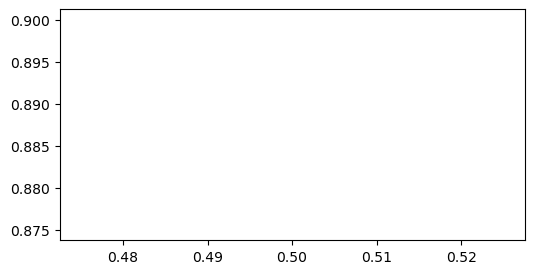

In [10]:
# Write the name of the csv-file that you can find in the folder 'Simulation Restuls' below. The name has format: SIM_YEAR-MM-DD_HourMinuteSecond.csv
# The boolean controls how much data is printed on the screen.
# The generated plots appear in the folder 'Simulation Results/Plots/Name csv-file'
SimulationsEvaluate_alpha_beta("SIM_2025-11-28_152148", False)